In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import imblearn
import sklearn

In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/Abdullah/Desktop/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().value_counts()

Time   V1     V2     V3     V4     V5     V6     V7     V8     V9     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28    Amount  Class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False    284807
Name: count, dtype: int64

# Data Preprocessing:
Handle imbalanced data using techniques like SMOTE or undersampling.


In [6]:
# !pip install imblearn

In [37]:
from imblearn.under_sampling import RandomUnderSampler
x=df.iloc[:,:-1] #except the last column
y=df.iloc[:,-1]# last column

<class 'pandas.core.frame.DataFrame'>


In [8]:
# Applying Random UnderSampling
res=RandomUnderSampler(random_state=42) # object for undersampler
x_res,y_res=res.fit_resample(x,y)

In [9]:
print(y_res.value_counts())

Class
0    492
1    492
Name: count, dtype: int64


In [10]:
print(f"x shape: {x.shape}, y shape: {y.shape}")
print(f"x_res shape: {x_res.shape}, y_res shape: {y_res.shape}")


x shape: (284807, 30), y shape: (284807,)
x_res shape: (984, 30), y_res shape: (984,)


In [11]:
print("Unique values in y:", set(y))
print("Unique values in y_res:", set(y_res))


Unique values in y: {0, 1}
Unique values in y_res: {0, 1}


In [39]:
x=np.array(x)
y=np.array(y)

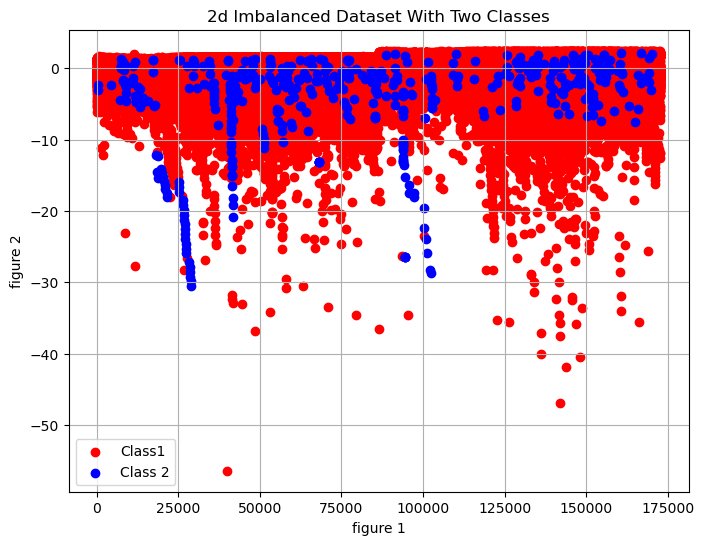

In [42]:
# plotting
plt.figure(figsize=(8,6))
# plt.subplot(1,2,1)
plt.scatter(x[y==0][:,0],x[y==0][:,1],color='red',label="Class1")
plt.scatter(x[y==1][:,0],x[y==1][:,1],color="blue",label="Class 2")

plt.title('2d Imbalanced Dataset With Two Classes')
plt.xlabel("figure 1")
plt.ylabel('figure 2')
plt.grid(True)
plt.legend()
plt.show()



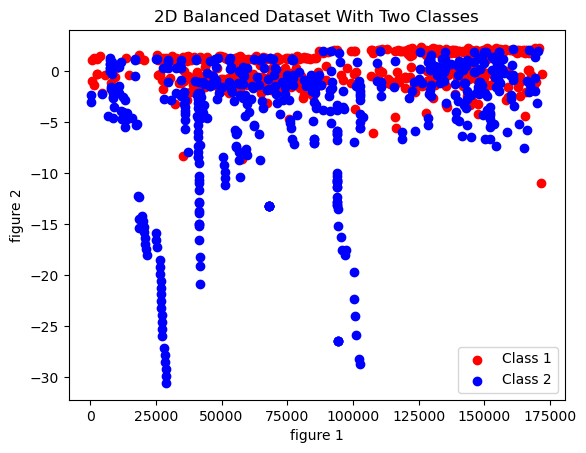

In [43]:
#creating an array of x_res,Y_res
import numpy as np
x_res=np.array(x_res)
y_res=np.array(y_res)

plt.scatter(x_res[y_res==0][:,0],x_res[y_res==0][:,1],color='red',label='Class 1')
plt.scatter(x_res[y_res==1][:,0],x_res[y_res==1][:,1],color='blue',label='Class 2')
plt.title("2D Balanced Dataset With Two Classes")
plt.xlabel("figure 1")
plt.ylabel("figure 2")
plt.legend()
plt.show()

In [49]:
# split the resampled data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

# Training Model

In [50]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

# Make Predictio

In [51]:
# Make Prediction
y_pred = rf_model.predict(x_test)

# Evaluate Model


In [60]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy is :{accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy is :92.39%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

